# San Diego Burrito Analytics

Scott Cole

23 April 2016

This notebook contains analyses on the burrito ratings in San Diego, including:
* How each metric correlates with one another.
* Linear model of how each dimension contributes to the overall rating

# Default imports

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style("white")

C:\Users\Scott\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Load data

In [180]:
filename="burrito_current.csv"
df = pd.read_csv(filename)
N = df.shape[0]

# Cali burritos vs. other burritos

In [106]:
# Identify california burritos
def caliburritoidx(x):
    import re
    idx = []
    for b in range(len(x)):
        re4str = re.compile('.*cali.*', re.IGNORECASE)
        if re4str.match(x[b]) is not None:
            idx.append(b)
    return idx

caliidx = caliburritoidx(df.Burrito)
Ncaliidx = np.arange(len(df))
Ncaliidx = np.delete(Ncaliidx,caliidx)

In [127]:
met_Cali = ['Hunger','Volume','Cost','Tortilla','Temp','Meat','Fillings','Meat:filling',
               'Uniformity','Salsa','Synergy','Wrap','overall']
for k in met_Cali:
    Mcali = df[k][caliidx].dropna()
    MNcali = df[k][Ncaliidx].dropna()
    print k
    print sp.stats.ttest_ind(Mcali,MNcali)

Hunger
Ttest_indResult(statistic=-0.54866656852575646, pvalue=0.58443327656113375)
Volume
Ttest_indResult(statistic=-1.181744265547761, pvalue=0.24761126388319155)
Cost
Ttest_indResult(statistic=0.37231937202870713, pvalue=0.71042753039024831)
Tortilla
Ttest_indResult(statistic=1.3534252950906041, pvalue=0.17891156228638563)
Temp
Ttest_indResult(statistic=2.0312156922031797, pvalue=0.044968980930911479)
Meat
Ttest_indResult(statistic=0.48418124016338993, pvalue=0.629305501608172)
Fillings
Ttest_indResult(statistic=0.44318178753735071, pvalue=0.65858208289853648)
Meat:filling
Ttest_indResult(statistic=-0.84491122336642899, pvalue=0.4001378956638737)
Uniformity
Ttest_indResult(statistic=-0.59884832788395115, pvalue=0.55061482575184373)
Salsa
Ttest_indResult(statistic=1.1872485701483237, pvalue=0.23818603397623547)
Synergy
Ttest_indResult(statistic=2.1762909303446163, pvalue=0.031887921544908597)
Wrap
Ttest_indResult(statistic=1.4829359548164081, pvalue=0.14123622153899251)
overall
Ttest_

# Independence of each dimension

In [146]:
df_Scott = df[df.Reviewer=='Scott']
idx_Scott = df2.index.values
idx_NScott = np.arange(len(df))
idx_NScott = np.delete(idx_NScott,idx_Scott)
burritos_Scott = df.loc[df2.index.values]['Burrito']

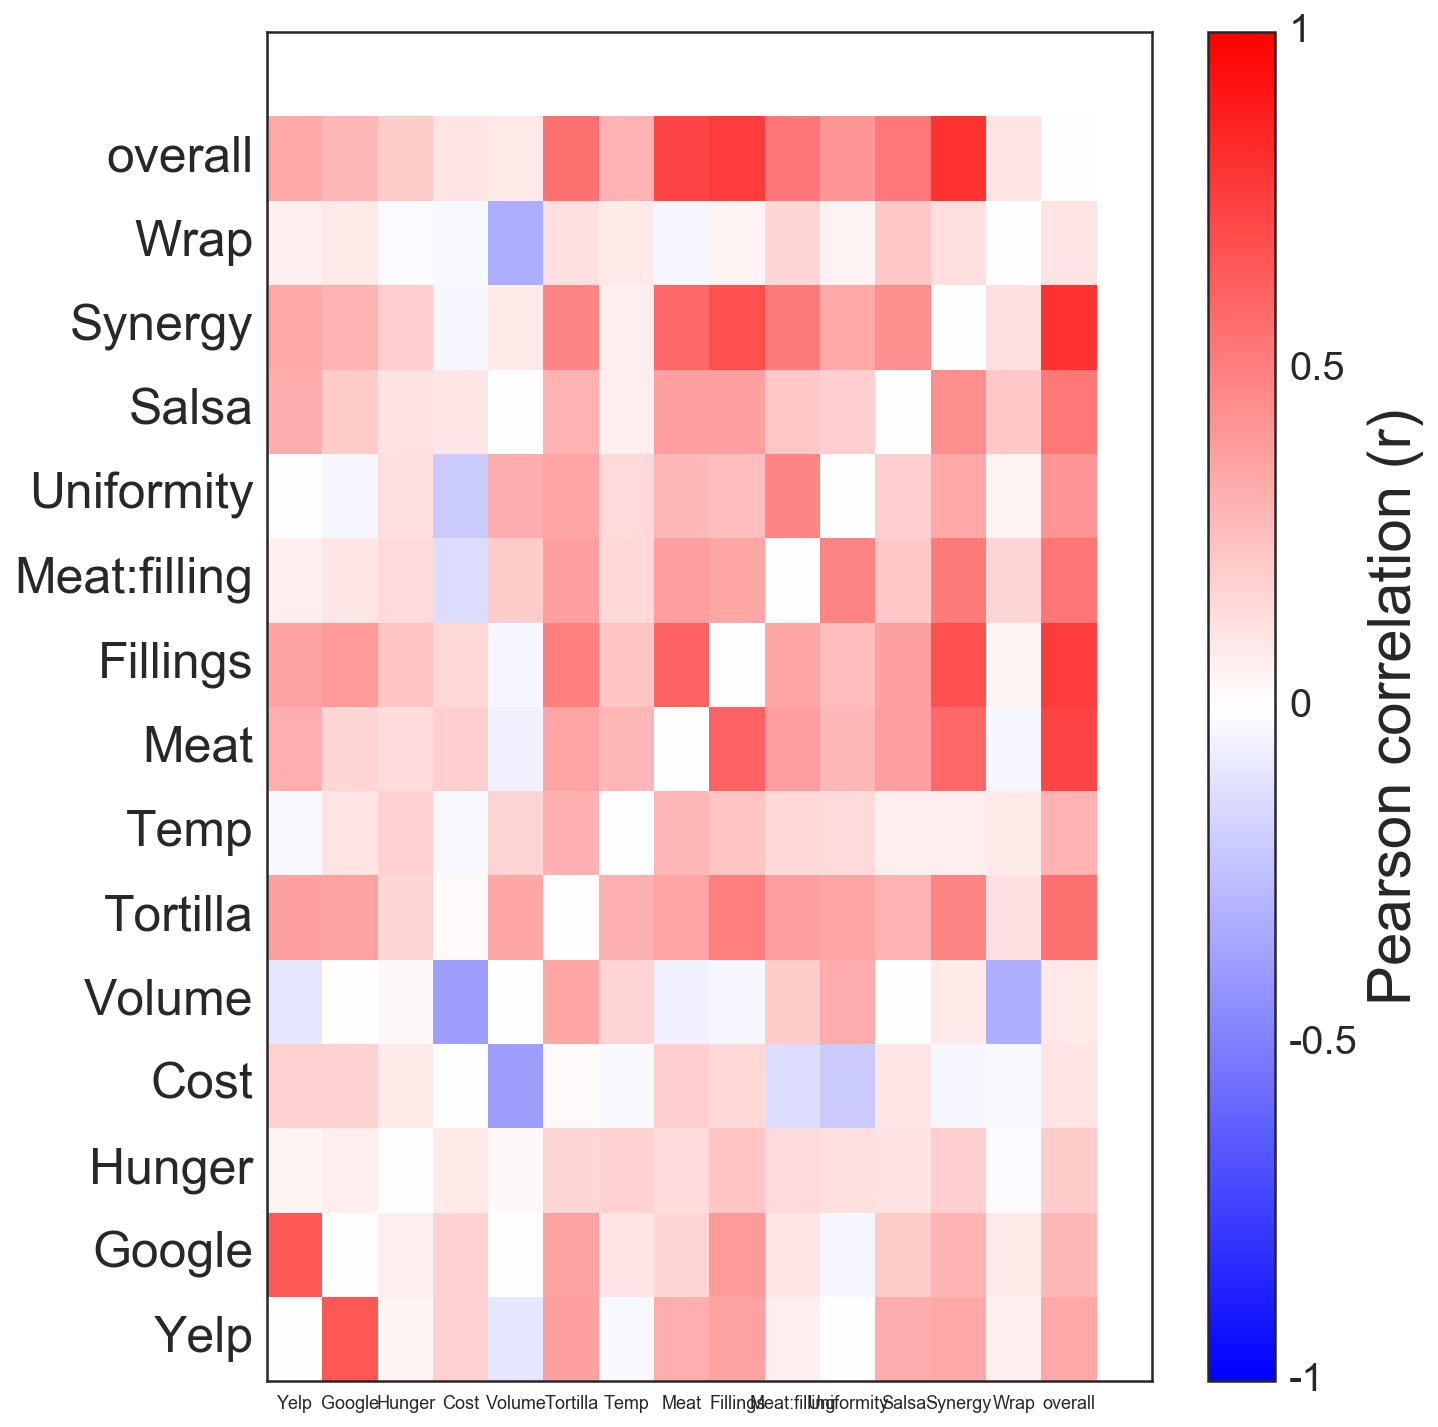

In [144]:
dfScorr = df_Scott.corr()

metricscorr = ['Yelp','Google','Hunger','Cost','Volume','Tortilla','Temp','Meat','Fillings','Meat:filling',
               'Uniformity','Salsa','Synergy','Wrap','overall']
M = len(metricscorr)

Mcorrmat = np.zeros((M,M))
Mpmat = np.zeros((M,M))
for m1 in range(M):
    for m2 in range(M):
        if m1 != m2:
            Mcorrmat[m1,m2] = dfcorr[metricscorr[m1]][metricscorr[m2]]
            Mpmat[m1,m2] = pearsonp(Mcorrmat[m1,m2],N)
            
clim1 = (-1,1)
plt.figure(figsize=(10,10))
cax = plt.pcolor(range(M+1), range(M+1), Mcorrmat, cmap=cm.bwr)
cbar = plt.colorbar(cax, ticks=(-1,-.5,0,.5,1))
cbar.ax.set_ylabel('Pearson correlation (r)', size=30)
plt.clim(clim1)
cbar.ax.set_yticklabels((-1,-.5,0,.5,1),size=20)
#plt.axis([2, M+1, floall[0],floall[-1]+10])
ax = plt.gca()
ax.set_yticks(np.arange(M)+.5)
ax.set_yticklabels(metricscorr,size=25)
ax.set_xticks(np.arange(M)+.5)
ax.set_xticklabels(metricscorr,size=9)
plt.tight_layout()

In [ ]:
# Try to argue that me sampling a bunch of burritos is equivalent to a bunch of people sampling burritos
# you would not be able to tell if a rated burrito was by me or someone else.

# Tests:
# 1. Means of each metric are the same
# 2. Metric correlations are the same (between each quality and overall)
# 3. Do I like Cali burritos more than other people?

In [147]:
# 1. Metric means are the same: I give my meat and meat:filling lower ratings
met_Scott = ['Hunger','Volume','Cost','Tortilla','Temp','Meat','Fillings','Meat:filling',
               'Uniformity','Salsa','Synergy','Wrap','overall']
for k in met_Scott:
    Msc = df[k][idx_Scott].dropna()
    MNsc = df[k][idx_NScott].dropna()
    print k
    print sp.stats.ttest_ind(Msc,MNsc)

Hunger
Ttest_indResult(statistic=-0.35515944428387269, pvalue=0.72320349253131666)
Volume
Ttest_indResult(statistic=0.32569543702126352, pvalue=0.74716554989761197)
Cost
Ttest_indResult(statistic=0.6418895400638277, pvalue=0.52238485954369307)
Tortilla
Ttest_indResult(statistic=-1.538189907305789, pvalue=0.12709866873400824)
Temp
Ttest_indResult(statistic=0.16871961167475821, pvalue=0.86636851309604335)
Meat
Ttest_indResult(statistic=-1.9864640647412954, pvalue=0.049691125740403012)
Fillings
Ttest_indResult(statistic=-1.6244282575689253, pvalue=0.10740127315147346)
Meat:filling
Ttest_indResult(statistic=-2.2264795472792414, pvalue=0.028181317840999365)
Uniformity
Ttest_indResult(statistic=-0.39351532077518508, pvalue=0.69476838917168504)
Salsa
Ttest_indResult(statistic=-0.18213800618467818, pvalue=0.85587515152365046)
Synergy
Ttest_indResult(statistic=-1.4317030200764307, pvalue=0.15534695808339646)
Wrap
Ttest_indResult(statistic=-1.3313416641041877, pvalue=0.18610371213303115)
overall